In [2]:
#importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
#leitura do nosso arquivo csv
df = pd.read_csv("titanic.csv")


In [4]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
#contar dados nulos em cada coluna 
nulos_por_coluna = df.isnull().sum()
print(nulos_por_coluna)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
#contar dados nulos por linhas
nulos_por_linhas = df.isnull().sum(axis=1)
print(nulos_por_linhas)

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    2
889    0
890    1
Length: 891, dtype: int64


In [12]:
#descrição de dados
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
#verificar informações  
info_df =df.info()
print(info_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [14]:
#remover linhas duplicadas
df = df.drop_duplicates()

In [19]:
#apagar linhas duplicadas da coluna 
df_teste = df.drop_duplicates(["PassengerId"])

In [21]:
#função das linhas duplicadas 
def visualizar_as_duplicadas(df):
    duplicados = df[df.duplicated(keep=False)]
    return duplicados

linhas_duplicadas = visualizar_as_duplicadas(df)
print(linhas_duplicadas)



Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
# renomear as colunas
df.rename(columns={
    'PassengerId': 'IdPassageiro',
    'Survived': 'Sobreviveu', 
    'Pclass': 'Classe',
    'Name': 'Nome',
    'Sex': 'Genero', 
    'Age':'Idade', 
    'Ticket':'Bilhete',
    'Fare': 'Tarifa',
    'Cabin': 'Cabine', 
    'Embarked': 'Embarque'
}, inplace=True)

In [30]:
#salve no csv
df.to_csv('titanic_tratado.csv', index=False)


#Análises

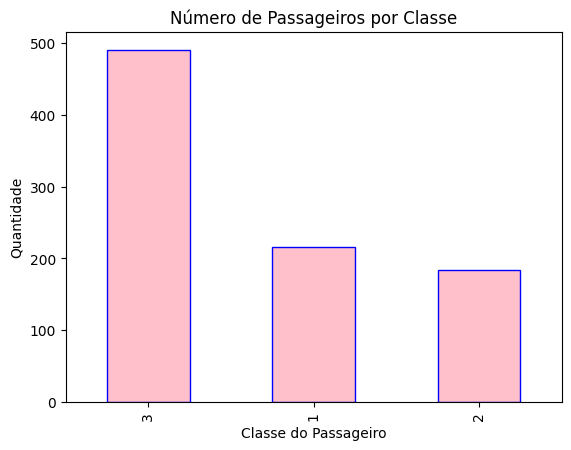

In [10]:
#Quantos passageiros estavam em cada classe do Titanic?
#contagem do número de passageiros
contagem_passeiros = df["Classe"].value_counts()
#criação do grafico
contagem_passeiros.plot(kind="bar", edgecolor="blue", color="pink")
#configurações
plt.xlabel("Classe do Passageiro")
plt.ylabel("Quantidade")
plt.title("Número de Passageiros por Classe")
plt.show()

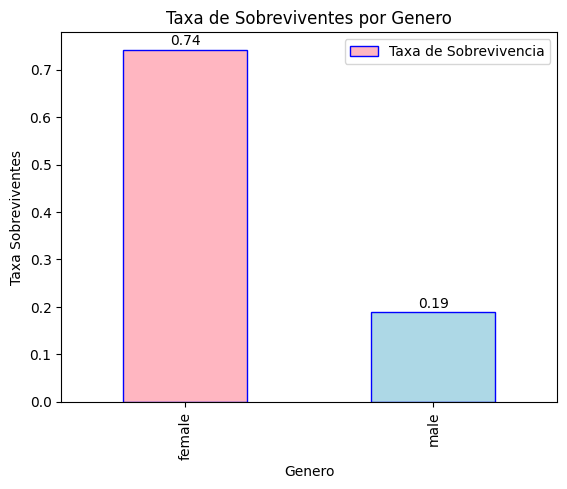

In [11]:
# Qual é taxa de sobreviventes por genero? 
# agrupamento de genero por sobreviventes
taxa_sob_genero = df.groupby("Genero")["Sobreviveu"].mean()
#cores para barras
cores = ["lightpink","lightblue"]
# plotagem
barras = taxa_sob_genero.plot.bar(edgecolor = "blue", color= cores)
# os rotulos
plt.xlabel("Genero")
plt.ylabel("Taxa Sobreviventes")
plt.title("Taxa de Sobreviventes por Genero")
#adicionar legendas
plt.legend(["Taxa de Sobrevivencia"])
#adicionar rotulos nos graficos
for i, v in enumerate(taxa_sob_genero):
    barras.text(i, v + 0.01, f'{v:.2f}', color = 'black', ha = 'center')
plt.show()

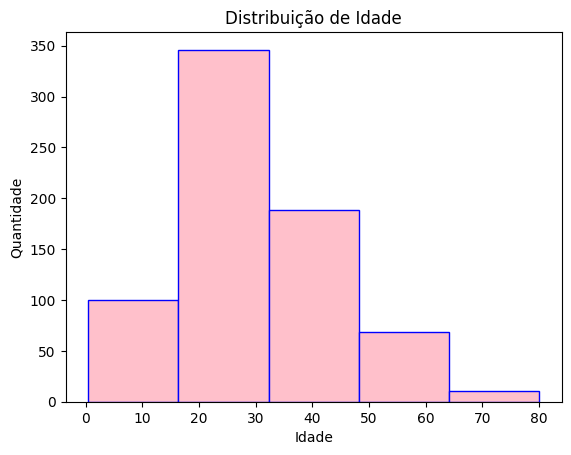

In [12]:
#Qual é a distribuição de idades?
#plotagem
df["Idade"].plot.hist(bins=5, edgecolor= "blue", color="pink")

plt.xlabel("Idade")
plt.ylabel("Quantidade")
plt.title("Distribuição de Idade")

plt.show()

In [14]:
from scipy.stats import ttest_ind
import seaborn as sns

Test T de idade
Estatistica T : -2.06668694625381
Valor P: 0.03912465401348249


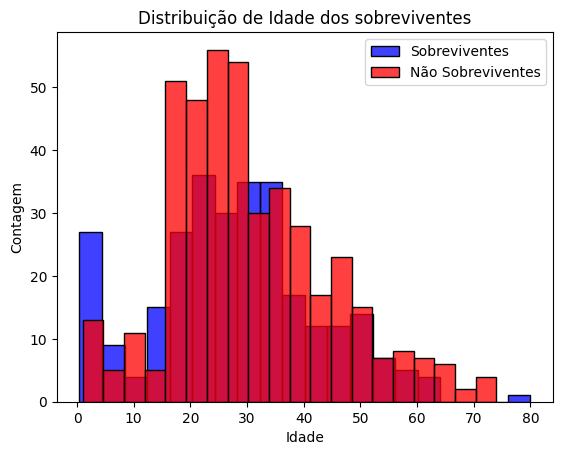

Rejeitamos a hipotese nula


In [20]:
#amostras

idade_sobreviventes = df[df['Sobreviveu']==1]['Idade'].dropna()
idade_nao_sobreviveu = df[df['Sobreviveu']==0]['Idade'].dropna()

#teste t 

estatistica_t, valor_p = ttest_ind(idade_sobreviventes, idade_nao_sobreviveu)

print("Test T de idade")
print(f"Estatistica T : {estatistica_t}")
print(f"Valor P: {valor_p}")

#grafico

sns.histplot(idade_sobreviventes,color= 'blue', label='Sobreviventes',bins=20)
sns.histplot(idade_nao_sobreviveu,color= 'red', label='Não Sobreviventes',bins=20)

#Rotulo

plt.legend()
plt.title("Distribuição de Idade dos sobreviventes")
plt.xlabel("Idade")
plt.ylabel ("Contagem")
plt.show()

#interpretação 

if valor_p < 0.05:
    print("Rejeitamos a hipotese nula")
else:
    print("Não rejeitamos a hipotese nula")